<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:250%; text-align:center; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">Threshold</h1>

<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:250%; text-align:left; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">1. Import Library</h1>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, plot_confusion_matrix, confusion_matrix, classification_report, f1_score, precision_score, recall_score, matthews_corrcoef, roc_auc_score

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectPercentile
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_csv('campaign_clean.csv').drop('Unnamed: 0', axis=1)
df.head(3)

,age,job,marital,education,housing,loan,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,label
0,56,housemaid,married,basic.4y,no,no,may,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,may,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,yes,no,may,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


## Data Splitting

In [18]:
X = df.drop('label', axis=1)
y = df['label']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=2020, test_size=.2)

In [20]:
### Pipeline
num_scale_trans = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
])


num_poly_trans = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=3))])


cat_trans = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])




### Transformer
preprocessor_1 = ColumnTransformer([
        ('num_scale_trans', num_scale_trans,['emp.var.rate','euribor3m','nr.employed','cons.price.idx','cons.conf.idx','age', 'campaign', 'pdays', 'previous']),
        ('cat', cat_trans, ['marital','housing','loan', 'poutcome','job', 'education', 'month'])
])
     
    
preprocessor_2 = ColumnTransformer([
        ('cat', cat_trans, ['marital','housing','loan', 'poutcome','job', 'education', 'month'])])


preprocessor_1_poly = ColumnTransformer([
        ('num_scale_trans', num_scale_trans,['emp.var.rate','euribor3m','nr.employed','cons.price.idx','cons.conf.idx','age', 'campaign', 'pdays', 'previous']),
        ('num_poly_trans', num_poly_trans,['emp.var.rate','euribor3m','nr.employed','cons.price.idx','cons.conf.idx','age', 'campaign', 'pdays', 'previous']),
        ('cat', cat_trans, ['marital','housing','loan', 'poutcome','job', 'education', 'month'])
])
     
    


<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:250%; text-align:left; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">2. Model Fitting</h1>

In [21]:
logreg_poly_select_tuned = Pipeline(steps=[('preprocessor_1_poly', preprocessor_1_poly),
                                ('select', SelectPercentile(percentile=30)),
                                ('logreg', LogisticRegression(solver='newton-cg', penalty='l2', max_iter=100,random_state = 2020))])

In [22]:
metric = 'precision'
def model_evaluation_cv(logreg_poly_select_tuned, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(logreg_poly_select_tuned, X_train, y_train, cv = skfold, scoring = metric, n_jobs=-1, verbose=1)
  return model_cv

def print_result(model_cv):
  print('logreg_poly_select_tuned CV Precision score',model_cv)
  print('logreg_poly_select_tuned CV Precision score mean',model_cv.mean())
  print('logreg_poly_select_tuned CV Precision score std',model_cv.std())

In [23]:
logreg_poly_select_tuned_model_cv = model_evaluation_cv(logreg_poly_select_tuned, metric)
print_result(logreg_poly_select_tuned_model_cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.6s remaining:   21.9s


logreg_poly_select_tuned CV Precision score [0.71341463 0.70512821 0.69512195 0.67171717 0.75903614]
logreg_poly_select_tuned CV Precision score mean 0.7088836213579087
logreg_poly_select_tuned CV Precision score std 0.02870762044202185


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.4s finished


In [110]:
logreg_poly_select_tuned.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_1_poly',
                 ColumnTransformer(transformers=[('num_scale_trans',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['emp.var.rate', 'euribor3m',
                                                   'nr.employed',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'age',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('num_poly_trans',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(degree=3))]),
                                                  ['emp.va

<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:250%; text-align:left; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">3. Model Evaluation</h1>

In [111]:
y_pred_logreg_poly_select_tuned = logreg_poly_select_tuned.predict(X_test)
print(classification_report(y_test, y_pred_logreg_poly_select_tuned))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6797
           1       0.71      0.18      0.29       852

    accuracy                           0.90      7649
   macro avg       0.81      0.59      0.62      7649
weighted avg       0.88      0.90      0.87      7649



In [112]:
precision_score(y_test,y_pred_logreg_poly_select_tuned)

0.7090909090909091

In [113]:
recall_score(y_test,y_pred_logreg_poly_select_tuned)

0.18309859154929578

In [114]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_logreg_poly_select_tuned))

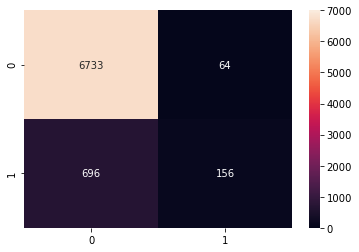

In [116]:
sns.heatmap(df_cm, annot=True, vmin=0, vmax=7000, fmt='1')
plt.show()

## Precision and Recall
- Precision is a metric that calculate the ratio between TP and FP following this formula TP/(TP+FP). Precision score is a metric that focus on false postive label, we use this to predict the negative label accurately (not assigned as positive).

- Recall is a metric that calculate the ratio between TP and FN following this formula TP/(TP+FN). Recall score is a metric that focus on false negative label, we use this to predict the positive label accurately (not assigned as negative).


## Metric for this case

1. FP is a condition when the model predict THE CLIENTS/CUSTOMERS do subscribe the deposit (1), but actually they do not subscribe (0)
    - High number of FP would increase the marketing budget and would spend lot of time
    - The company's revenue will decrease due to lot of budget and time that they spend to call the False Positive Clients/Customer
    
    
2. FN is a condition when the model predict THE CLIENTS/CUSTOMERS do not subscribe the deposit (0), buat actually they subscibe (1)
    - High number of FN would make the company more missing the potential clients/customers.
    - The company;s revenue will might decrease due to missing the potential clients/customers prediction,


<img src="https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png" alt="Hotel Lobby" style="width:690px;height:345px;">
 
As I mentioned before in #1 notebook the main goal this project is making the campaign more efficient in terms of budget and time. So that in this case, we are going to use precision metric. Because we need to reduce the FP, a component that make budget and time are floating.

<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:250%; text-align:left; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">4. Picking Threshold</h1>

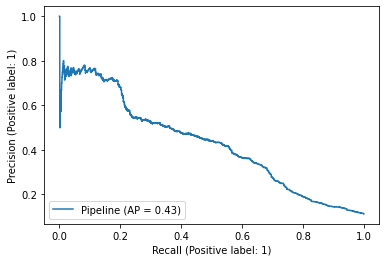

In [117]:
plot_precision_recall_curve(logreg_poly_select_tuned, X_test, y_test)

In [125]:
y_proba = logreg_poly_select_tuned.predict_proba(X_test)
y_proba = y_proba[:,1]
prec, recall, thresh = precision_recall_curve(y_test, y_proba)

In [137]:
# pd.DataFrame(y_proba).sort_values(by=0 ,ascending=False)

,0
1017,0.823168
2322,0.815734
7062,0.815076
6497,0.806609
1611,0.804756
...,...
6540,0.034611
1134,0.034611
2352,0.034611
2739,0.034611


In [126]:
pr_df = pd.DataFrame({'precision': prec[:-1], 'recall': recall[:-1], 'threshold': thresh})
pr_df

,precision,recall,threshold
0,0.111562,1.000000,0.034824
1,0.111548,0.998826,0.034876
2,0.111563,0.998826,0.034927
3,0.111577,0.998826,0.034936
4,0.111621,0.998826,0.034978
...,...,...,...
2666,0.600000,0.003521,0.804756
2667,0.500000,0.002347,0.806609
2668,0.666667,0.002347,0.815076
2669,0.500000,0.001174,0.815734


In [127]:
pr_df[(pr_df['precision']>=0.7090) & (pr_df['recall']<=0.1840)].sort_values(by='recall', ascending=False).head(25)

,precision,recall,threshold
2453,0.709091,0.183099,0.503324
2455,0.711009,0.181925,0.508277
2456,0.709677,0.180751,0.511710
2458,0.711628,0.179577,0.521399
2459,0.714953,0.179577,0.525697
2460,0.713615,0.178404,0.532208
2461,0.712264,0.177230,0.540937
2462,0.710900,0.176056,0.543731
2463,0.714286,0.176056,0.544641
2464,0.717703,0.176056,0.554248


In [128]:
## Default
## Prec = 0.709091
## Rec = 0.183099
## Thresh = 0.503324


## New Threshold
## Prec = 0.723301
## Rec = 0.174883
## Thresh = 0.613482

print("Precision = +", 0.723301-0.709091)
print("Recall = -", 0.183099-0.174883)

Precision = + 0.014209999999999945
Recall = - 0.008216000000000001


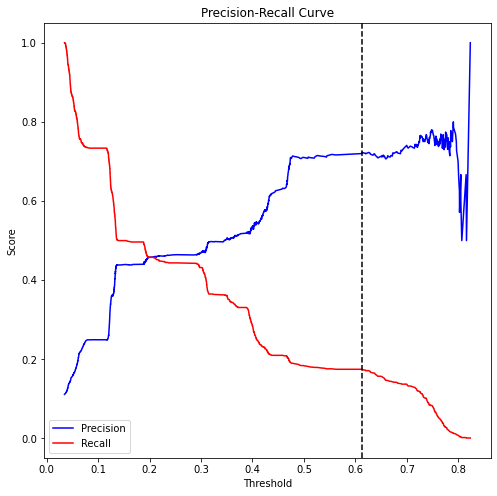

In [129]:
plt.figure(figsize=(8, 8))
plt.title("Precision-Recall Curve")
plt.plot(thresh, prec[:-1], "b-", label="Precision")
plt.plot(thresh, recall[:-1], "r-", label="Recall")
plt.axvline(x=0.613482, color="black", linestyle="--")
plt.ylabel("Score")
plt.xlabel("Threshold")
plt.legend()

## Conclussion
1. We decide to use threshold at 0.613482

# Other Metric Evaluation

In [18]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

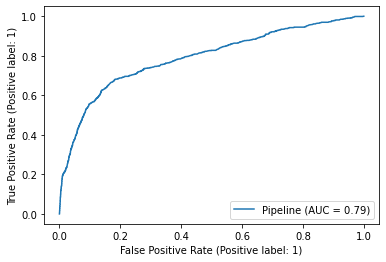

In [19]:
plot_roc_curve(logreg_poly_select_tuned, X_test, y_test)

<img src="http://algolytics.com/wp-content/uploads/2018/05/roc1_en.png">